## Integral Trapesium (Trapezoidal) dengan segmen tanpa input

Input the a number : 0
Input the b number : 1.125
Input the error rate you want : 0.01
Jika ditest dengan Integral biasa :  0.7537718023763801
Hasil Integral Trapesium =  0.7538428243260339 dengan Segmen N :  34


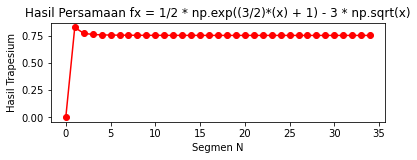

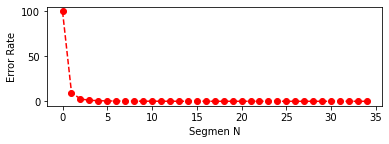

In [32]:
import numpy as np
import scipy.integrate as integral
import matplotlib.pyplot as plt

#fx = lambda x : 1/2 * np.exp((3/2)*(x) + 1) - 3 * np.sqrt(x) # dari soal
fx = lambda x : 1/(1 + x)

a = float(input("Input the a number : "))
b = float(input("Input the b number : "))
error = float(input("Input the error rate you want : "))

# Test terlebih dahulu dengan integral biasa dengan method scipy.quad
cobatestintegral,error_scipy = integral.quad(fx, a , b)
print("Jika ditest dengan Integral biasa : " , cobatestintegral)

n = 0
error_rate = 100

segmen_N_trape = [n]
error_N_trape = [error_rate]
hasil_Int_trape = [0]

while error_rate > error: 

    delta_X = (b - a)/(n+1) # hasil h

    fxa = fx(a)
    fxb = fx(b)

    # arangeforlooping = np.arange(a,b+1, delta_X)
    arangeplusforlooping = [a] # Untuk menjumlahkan x1 hingga xn - 1 (Gunakan ini jangan np.arange)
    g = a
    for i in range(1,n+1):
        g += delta_X
        arangeplusforlooping.append(g)

    fx_2kalitrapezoidal = []
    for i in range(1,n+1):
        trapezoidal2kali = 2 * fx(arangeplusforlooping[i])
        fx_2kalitrapezoidal.append(trapezoidal2kali)
        #print("{}. 2 * fx({}) = {}".format(i,arangeforlooping[i],trapezoidal2kali))
    
    #Hasil operasi Dengan metode Trapesium
    Trapezoidal = (delta_X/2) * (fx(a) + sum(fx_2kalitrapezoidal) + fx(b))
    #print("Hasil Integral Trapezoidal : " , Trapezoidal)

    error_rate = abs((cobatestintegral - Trapezoidal)/cobatestintegral) * 100
    # print(error_rate)
    n = n + 1
    fx_2kalitrapezoidal = [] # Dikembalikan ke dalam list semula karena tidak boleh kehitung 2 kali
    
    segmen_N_trape.append(n)
    error_N_trape.append(error_rate)
    hasil_Int_trape.append(Trapezoidal)
    
    
    
print("Hasil Integral Trapesium = ", hasil_Int_trape[len(segmen_N_trape) - 1], "dengan Segmen N : " , segmen_N_trape[len(segmen_N_trape) - 1])

# Plotting untuk Integral Trapesium (Khusus Trapesium)
plt.subplot(2,1,1)
Hasil_segmen = plt.plot(segmen_N_trape, hasil_Int_trape , color = "red" , marker = "o")
plt.title("Hasil Persamaan fx = 1/2 * np.exp((3/2)*(x) + 1) - 3 * np.sqrt(x)")
plt.xlabel("Segmen N")
plt.ylabel("Hasil Trapesium")
plt.show()

plt.subplot(2,1,2)
Hasil_error = plt.plot(segmen_N_trape, error_N_trape , "g--d" ,color = "red" , marker = "o")
plt.xlabel("Segmen N")
plt.ylabel("Error Rate")
plt.show()

## Integral Numerik Simpson 1/3 Dengan segmen tanpa input

Input the a number : 0
Input the b number : 1.125
Input the error rate you want : 0.01
Jika ditest dengan Integral :  0.7537718023763801
Hasil metode Simpson 1/3 :  0.7538080008975345 dengan segmen N :  6


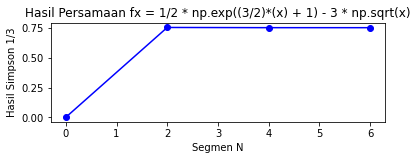

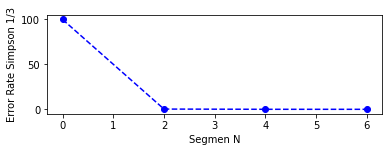

In [33]:
import numpy as np
import scipy.integrate as integral
import matplotlib.pyplot as plt

#fx = lambda x : 1/2 * np.exp((3/2)*(x) + 1) - 3 * np.sqrt(x) # dari soal
fx = lambda x : 1/(1 + x)

a = float(input("Input the a number : "))
b = float(input("Input the b number : "))
error = float(input("Input the error rate you want : "))

# Jika ditest dengan integral sebenarnya dengan method scipy.quad
cobatestintegral,error_scipy = integral.quad(fx, a , b)
print("Jika ditest dengan Integral : " , cobatestintegral)


n = 0
error_rate = 100

segmen_N_simpson_sepertiga = [n]
error_N_simpson_sepertiga = [error_rate]
hasil_integrate_simpson_sepertiga = [0]

while error_rate > error:
    
    if n % 2 != 0: # Karena python looping nya dimulai dari 0 dan menambahkan n nya di bawah conditional
        delta_X = (b - a)/(n+1)

        #arangeforlooping = np.arange(a,b+1, delta_X)
        arangeplusforlooping = [a] # Untuk menjumlahkan x1 hingga xn - 1 (Gunakan ini jangan np.arange)
        g = a
        for i in range(1,n+1):
            g += delta_X
            arangeplusforlooping.append(g)

        fx_4dan2kalisimpson = []
    
        for i in range(1,n+1):
            if i % 2 != 0:
                d = 4
                simpsonsepertiga_empat = d * fx(arangeplusforlooping[i])
                fx_4dan2kalisimpson.append(simpsonsepertiga_empat)
                #print("{3}. {0} * fx({1}) = {2}".format(d,arangeforlooping[i],simpsonsepertiga_empat, i))
            elif i % 2 == 0:
                d = 2
                simpsonsepertiga_dua = d * fx(arangeplusforlooping[i])
                fx_4dan2kalisimpson.append(simpsonsepertiga_dua)
                #print("{3}. {0} * fx({1}) = {2}".format(d,arangeforlooping[i],simpsonsepertiga_dua , i))
        
        # Hasil pengoperasian dengan metode Simpson 1/3
        simpson_sepertiga = (delta_X/3) * (fx(a) + sum(fx_4dan2kalisimpson) + fx(b))
    
        error_rate = abs((cobatestintegral - simpson_sepertiga)/cobatestintegral) * 100
        #print(error_rate)
        fx_4dan2kalisimpson = [] # Dikembalikan ke dalam list semula karena tidak boleh kehitung 2 kali
        n = n + 1
        
        segmen_N_simpson_sepertiga.append(n)
        error_N_simpson_sepertiga.append(error_rate)
        hasil_integrate_simpson_sepertiga.append(simpson_sepertiga)
    else:
        n = n + 1

print("Hasil metode Simpson 1/3 : " , hasil_integrate_simpson_sepertiga[len(segmen_N_simpson_sepertiga) - 1] , "dengan segmen N : " , segmen_N_simpson_sepertiga[len(segmen_N_simpson_sepertiga) - 1])

# Plotting hasil Integral Simpson 1/3 ( Khusus 1/3 saja )
plt.subplot(2,1,1)
Hasil_segmen = plt.plot(segmen_N_simpson_sepertiga, hasil_integrate_simpson_sepertiga , color = "blue" , marker = "o")
plt.title("Hasil Persamaan fx = 1/2 * np.exp((3/2)*(x) + 1) - 3 * np.sqrt(x)")
plt.xlabel("Segmen N")
plt.ylabel("Hasil Simpson 1/3")
plt.show()

plt.subplot(2,1,2)
Hasil_error = plt.plot(segmen_N_simpson_sepertiga , error_N_simpson_sepertiga , "g--d" , color = "blue" , marker = "o")
plt.xlabel("Segmen N")
plt.ylabel("Error Rate Simpson 1/3")
plt.show()

## Hasil Gabungan Plotting untuk Perbandingan Grafiknya

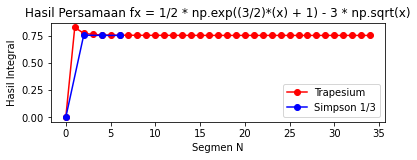

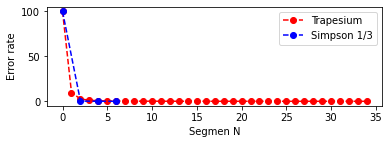

In [34]:
# Plotting gabungan perbandingan hasil Integral dan error nya
plt.subplot(2,1,1)
Hasil_segmen_trape =  plt.plot(segmen_N_trape, hasil_Int_trape , color = "red" , marker = "o" , label = "Trapesium")
Hasil_segmen_simpson = plt.plot(segmen_N_simpson_sepertiga, hasil_integrate_simpson_sepertiga , color = "blue" , marker = "o" , label = "Simpson 1/3")
plt.title("Hasil Persamaan fx = 1/2 * np.exp((3/2)*(x) + 1) - 3 * np.sqrt(x)")
plt.xlabel("Segmen N")
plt.ylabel("Hasil Integral")
plt.legend()
plt.show()

plt.subplot(2,1,2)
Hasil_error_trape = plt.plot(segmen_N_trape, error_N_trape , "g--d" , color = "red" , marker = "o" , label = "Trapesium")
Hasil_error_simpson = plt.plot(segmen_N_simpson_sepertiga , error_N_simpson_sepertiga , "g--d" , color = "blue" , marker = "o" , label = "Simpson 1/3")
plt.xlabel("Segmen N")
plt.ylabel("Error rate")
plt.legend()
plt.show()

## Di bawah ini Jangan dicopas Codingnya ini buat tools support liat hasil doang

In [ ]:
error_N

In [ ]:
segmen_N

In [ ]:
hasil_integrate_simpson_sepertiga

In [35]:
nilai_integral_eksak = [cobatestintegral]

In [36]:
import pandas as pd

# Entar segmen pilih salah satu yang paling tinggi untuk dimasukkan ke word
dataframe_segmen_trapesium = pd.DataFrame(segmen_N_trape, columns = ["Banyaknya Segmen Trapesium"])
dataframe_segmen_simpson = pd.DataFrame(segmen_N_simpson_sepertiga, columns = ["Banyaknya Segmen Simpson 1/3"])
dataframe_Nilai_Integral_Analitis = pd.DataFrame(nilai_integral_eksak , columns = ["Nilai Integral Eksak"]) # ini ada versi sendiri
dataframe_Nilai_Integral_Trapesium = pd.DataFrame(hasil_Int_trape, columns = ["Nilai Integral Trapesium"])
dataframe_Nilai_Error_Trapesium = pd.DataFrame(error_N_trape, columns = ["Presentase Error Integral Trapesium"])
dataframe_Nilai_Integral_Simpson = pd.DataFrame(hasil_integrate_simpson_sepertiga , columns = ["Nilai Integral Simpson 1/3"])
dataframe_Nilai_Error_Simpson = pd.DataFrame(error_N_simpson_sepertiga, columns = ["Presentase Error Integral Simpson 1/3"])

In [37]:
d1 = dataframe_segmen_trapesium.join(dataframe_segmen_simpson)
d2 = d1.join(dataframe_Nilai_Integral_Analitis)
d3 = d2.join(dataframe_Nilai_Integral_Trapesium)
d4 = d3.join(dataframe_Nilai_Error_Trapesium)
d5 = d4.join(dataframe_Nilai_Integral_Simpson)
hasil_datatabel = d5.join(dataframe_Nilai_Error_Simpson)

In [38]:
hasil_datatabel

,Banyaknya Segmen Trapesium,Banyaknya Segmen Simpson 1/3,Nilai Integral Eksak,Nilai Integral Trapesium,Presentase Error Integral Trapesium,Nilai Integral Simpson 1/3,Presentase Error Integral Simpson 1/3
0,0,0.0,0.753772,0.000000,100.000000,0.000000,100.000000
1,1,2.0,NaN,0.827206,9.742216,0.755735,0.260489
2,2,4.0,NaN,0.773603,2.630921,0.753940,0.022368
3,3,6.0,NaN,0.762748,1.190875,0.753808,0.004802
4,4,NaN,NaN,0.758856,0.674506,NaN,NaN
5,5,NaN,NaN,0.757036,0.433111,NaN,NaN
6,6,NaN,NaN,0.756043,0.301320,NaN,NaN
7,7,NaN,NaN,0.755442,0.221624,NaN,NaN
8,8,NaN,NaN,0.755052,0.169804,NaN,NaN
9,9,NaN,NaN,0.754784,0.134233,NaN,NaN


In [31]:
# Masukkan ke excel
Hasil_data = hasil_datatabel.to_excel("Hasil Data1.xlsx")

In [39]:
Hasil_data2 = hasil_datatabel.to_excel("Hasil Data2.xlsx") #